In [2]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset from sklearn datasets
from sklearn.datasets import load_iris

In [12]:
# create dataframe from loaded data
dfx = load_iris()
df = pd.DataFrame(dfx.data, columns= dfx.feature_names)
df['target'] = dfx.target

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# split features and target data
X = df.drop('target',axis = 1)
y = df['target']

In [17]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
# import logistic regression for prediction
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [19]:
# model fit on data
lor.fit(X_train,y_train)

C:\Users\mridh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# data prediction
y_pred = lor.predict(X_test)

In [21]:
# predicted values probability
lor.predict_proba(X_test)

array([[9.83661907e-01, 1.63380748e-02, 1.77023341e-08],
       [9.75544858e-01, 2.44550589e-02, 8.27859364e-08],
       [2.58379940e-02, 9.19517118e-01, 5.46448884e-02],
       [8.27522328e-02, 9.07119304e-01, 1.01284632e-02],
       [9.73361478e-01, 2.66384305e-02, 9.17450643e-08],
       [2.93582978e-01, 7.04637991e-01, 1.77903033e-03],
       [9.49508664e-01, 5.04909263e-02, 4.10011327e-07],
       [1.21123296e-04, 1.42585514e-01, 8.57293362e-01],
       [9.77222413e-01, 2.27775451e-02, 4.15386307e-08],
       [6.80454433e-08, 5.20364494e-03, 9.94796287e-01],
       [2.89763650e-03, 7.56877422e-01, 2.40224942e-01],
       [1.30895918e-04, 5.74348103e-02, 9.42434294e-01],
       [9.47435504e-05, 7.15395435e-02, 9.28365713e-01],
       [9.81096741e-01, 1.89032152e-02, 4.33347178e-08],
       [7.08604382e-03, 9.04835336e-01, 8.80786199e-02],
       [1.35695374e-06, 2.25640145e-02, 9.77434629e-01],
       [1.20750205e-07, 5.60317066e-03, 9.94396709e-01],
       [4.39435708e-03, 8.27546

In [22]:
# coefficients
lor.coef_

array([[-0.40242189,  0.86382491, -2.42914616, -0.98080153],
       [ 0.4891101 , -0.17605668, -0.21498089, -0.79109037],
       [-0.0866882 , -0.68776823,  2.64412705,  1.77189191]])

In [23]:
# intercepts
lor.intercept_

array([  9.66929889,   1.74653548, -11.41583436])

In [40]:
# import performance metrics to check performance of our model
from sklearn.metrics import roc_auc_score, accuracy_score
print('Auroc Score:', roc_auc_score(y_test,lor.predict_proba(X_test), multi_class='ovr'))
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Auroc Score: 0.9935802469135803
Accuracy Score: 0.9666666666666667


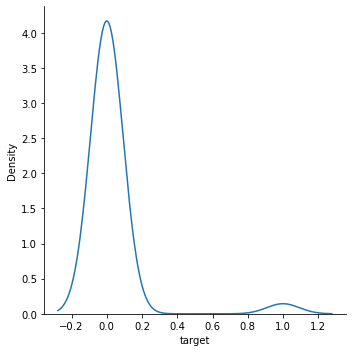

In [32]:
# check difference between actual and predicted points by displot
sns.displot(y_pred-y_test, kind = 'kde')